In [96]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [100]:
user = pd.read_csv('user_table.csv')
test = pd.read_csv('test_table.csv', parse_dates =['date'])

In [101]:
user.head()

,user_id,sex,age,country
0,765821,M,20,Mexico
1,343561,F,27,Nicaragua
2,118744,M,23,Colombia
3,987753,F,27,Venezuela
4,554597,F,20,Spain


In [102]:
test.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1


In [103]:
 len(user['user_id'])   == len(test['user_id'])

False

In [104]:
data = test.merge(user, on = 'user_id', how = 'outer')
data.describe()

,user_id,conversion,test,age
count,453321.000000,453321.000000,453321.000000,452867.000000
mean,499937.514728,0.049579,0.476446,27.130740
std,288665.193436,0.217073,0.499445,6.776678
min,1.000000,0.000000,0.000000,18.000000
25%,249816.000000,0.000000,0.000000,22.000000
50%,500019.000000,0.000000,0.000000,26.000000
75%,749522.000000,0.000000,1.000000,31.000000
max,1000000.000000,1.000000,1.000000,70.000000


In [105]:
np.sum(data.isnull())

user_id                  0
date                     0
source                   0
device                   0
browser_language         0
ads_channel         271444
browser                  0
conversion               0
test                     0
sex                    454
age                    454
country                454
dtype: int64

In [181]:
data['is_ads_channel'] = 0
data.loc[data['ads_channel'].isnull()== True ,'is_ads_channel'] =1

In [183]:
data[data['sex'].isnull()].head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country,is_ads_channel
819,657841,2015-12-02,Ads,Mobile,ES,Bing,Android_App,0,0,NaN,NaN,NaN,0
1696,859340,2015-12-04,Direct,Mobile,EN,NaN,Android_App,0,0,NaN,NaN,NaN,1
1934,716487,2015-12-04,SEO,Mobile,ES,NaN,Android_App,0,0,NaN,NaN,NaN,1
2409,87209,2015-12-01,Direct,Web,ES,NaN,Chrome,0,0,NaN,NaN,NaN,1
2721,771642,2015-11-30,SEO,Mobile,ES,NaN,Android_App,0,0,NaN,NaN,NaN,1


In [187]:
#data[data.isnull()].index
#data.isnull()
data = data.loc[data['sex'].isnull() == False ]

In [188]:
data[data['sex'].isnull() == True]

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country,is_ads_channel


In [191]:
np.sum(data.isnull())

user_id                  0
date                     0
source                   0
device                   0
browser_language         0
ads_channel         271174
browser                  0
conversion               0
test                     0
sex                      0
age                      0
country                  0
is_ads_channel           0
dtype: int64

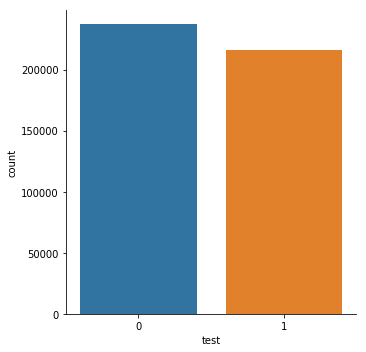

In [192]:
_ = sns.catplot( 'test',data= data, kind = 'count')

In [193]:
data[data.isnull()].head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country,is_ads_channel
0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


For test and control data, they have similar numbers.

In [194]:
data.groupby('country')['conversion'].agg(['mean']).sort_values(by= 'mean',ascending = False)

,mean
country,
Spain,0.079719
Costa Rica,0.053494
Nicaragua,0.053399
Colombia,0.051332
El Salvador,0.050765
Mexico,0.050341
Peru,0.050258
Chile,0.049704
Venezuela,0.049666


In [195]:
s =stats.ttest_ind(data.loc[data['test'] == 1, 'conversion'], data.loc[data['test'] == 0, 'conversion'])
print(s[1])


6.085918317754031e-74


# We can reject the hypothesis that they have the same mean
The reasons could be:
1. We didn't collect enough data
2. Some bias has been introduced in the test, so test/control people are not random

In [196]:
# test conversion ratio
ratio = data[data['test'] == 1].groupby('date')['conversion'].mean()/data[data['test'] == 0].groupby('date')['conversion'].mean()

Text(0,0.5,'Test Conversion/ Control Conversion')

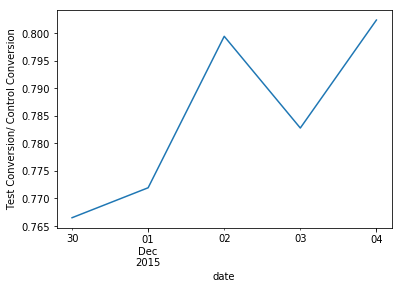

In [197]:
ax = ratio.plot(figsize= (6,4))
ax.set_xlabel('date')
ax.set_ylabel('Test Conversion/ Control Conversion')

We can see an increase in the test converison ratio for the test sample which runs only 5 days.
In order to take take unbiased data, we have to take long time data, probably 1 week or 2. 
# For the a/b test to be valid, both the control and test sample have to be the same except for the one feature.
## If they are not then the effect of another feature could of caused the change in conversion.
### In here we will use three tools:
1. plot the distributions of the each feature for test and control
2. use a decision tree to see if any feature can predict whether a data point is in a test or control
3. use a t-test tp verify results

# 1. plot distribution of each feature 

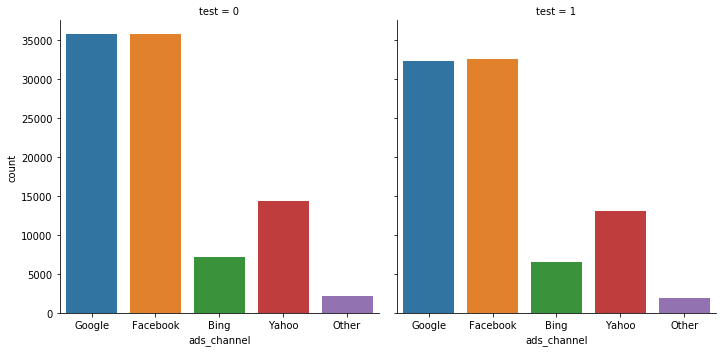

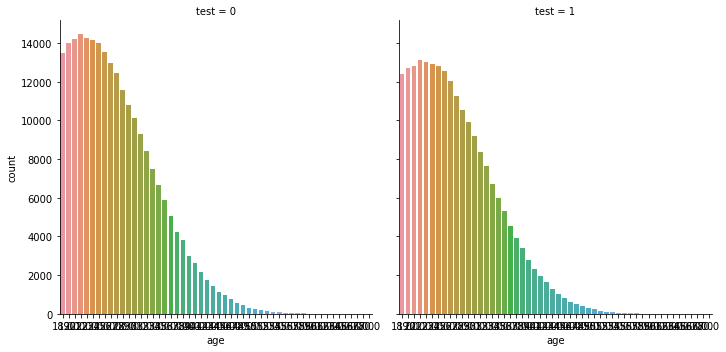

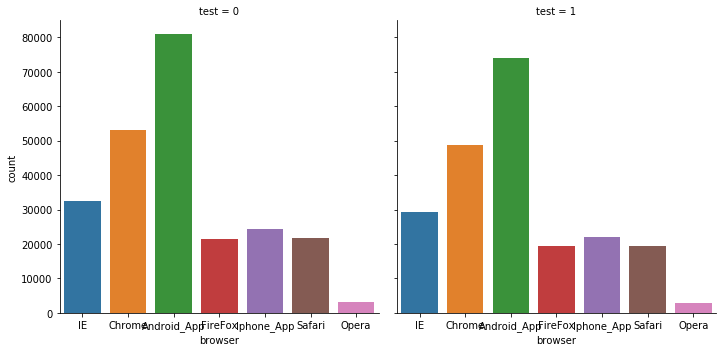

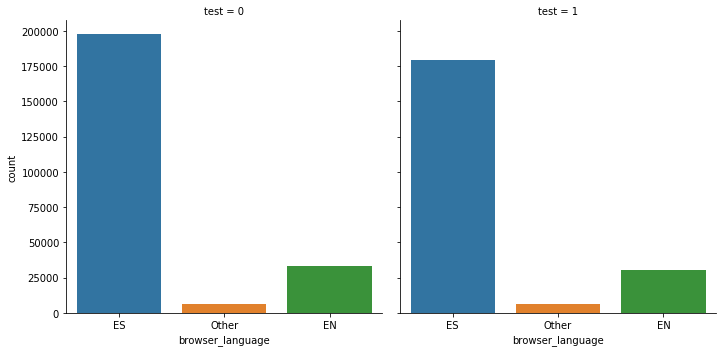

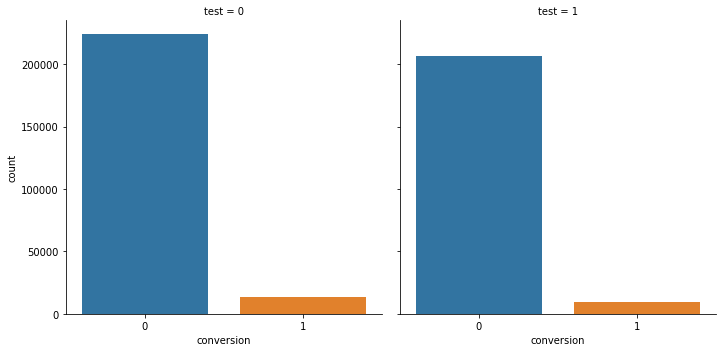

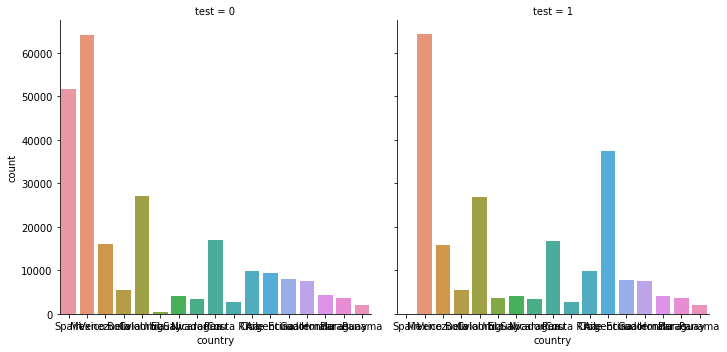

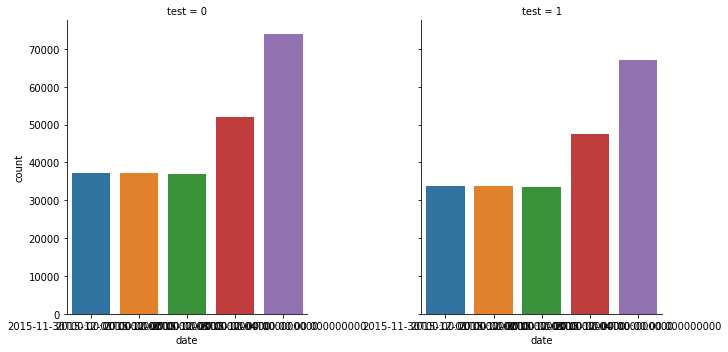

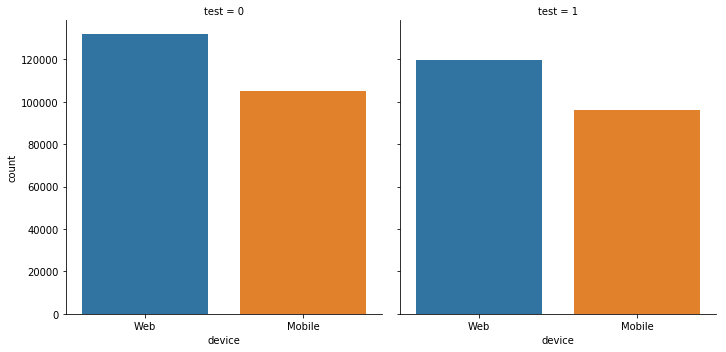

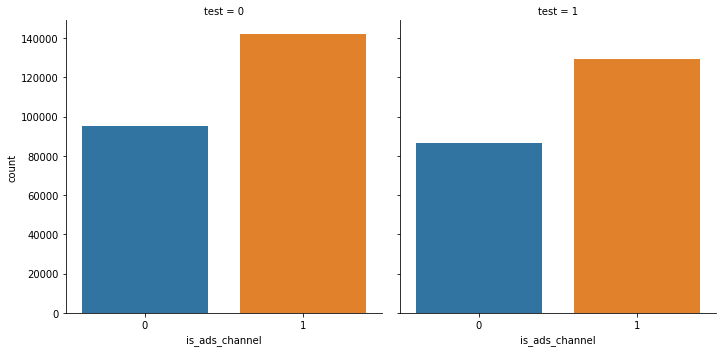

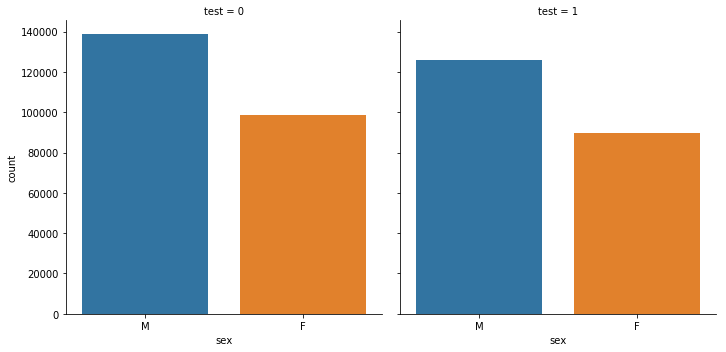

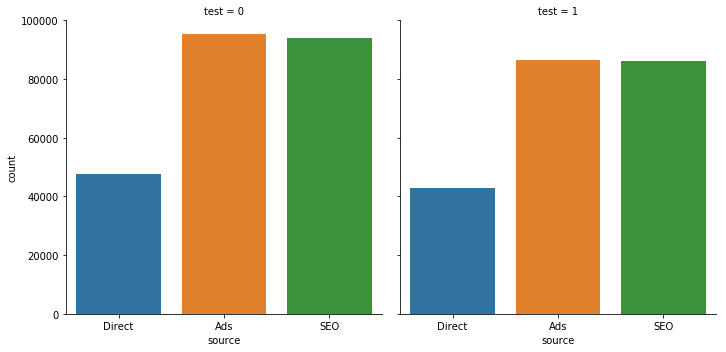

In [198]:
# examine the relation to conversion for each feature on test/control:
for i in (data.columns.difference(['user_id','test'])):
    sns.catplot(i,col= 'test',data = data, kind = 'count')           #, 

We can see there is no clear difference between the control and test sample for each features

# 2. Training a model to test for bias
Here we will ues a random forrest classsifier to see if any features become significant in predicting whether a data point is int a test or control sample. The test column is taken to be the dependent variable while the rest to be independent variables. 

In [203]:
tree_df = data[data.columns.difference(['conversion','date','user_id'])]

In [204]:
tree_df = pd.get_dummies(tree_df)

In [205]:
tree_df.head()

,age,is_ads_channel,test,ads_channel_Bing,ads_channel_Facebook,ads_channel_Google,ads_channel_Other,ads_channel_Yahoo,browser_Android_App,browser_Chrome,...,country_Spain,country_Uruguay,country_Venezuela,device_Mobile,device_Web,sex_F,sex_M,source_Ads,source_Direct,source_SEO
0,32.0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,1,0
1,21.0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
2,34.0,0,0,0,1,0,0,0,0,1,...,1,0,0,0,1,0,1,1,0,0
3,22.0,0,1,0,1,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
4,19.0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0


In [206]:
# Train the Tree
from sklearn.tree import DecisionTreeClassifier
X= tree_df.drop('test', axis =1, inplace = False)
y = tree_df['test']
y.columns = ['test']
tree = DecisionTreeClassifier()
tree.fit(X,y)
#y.head()


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

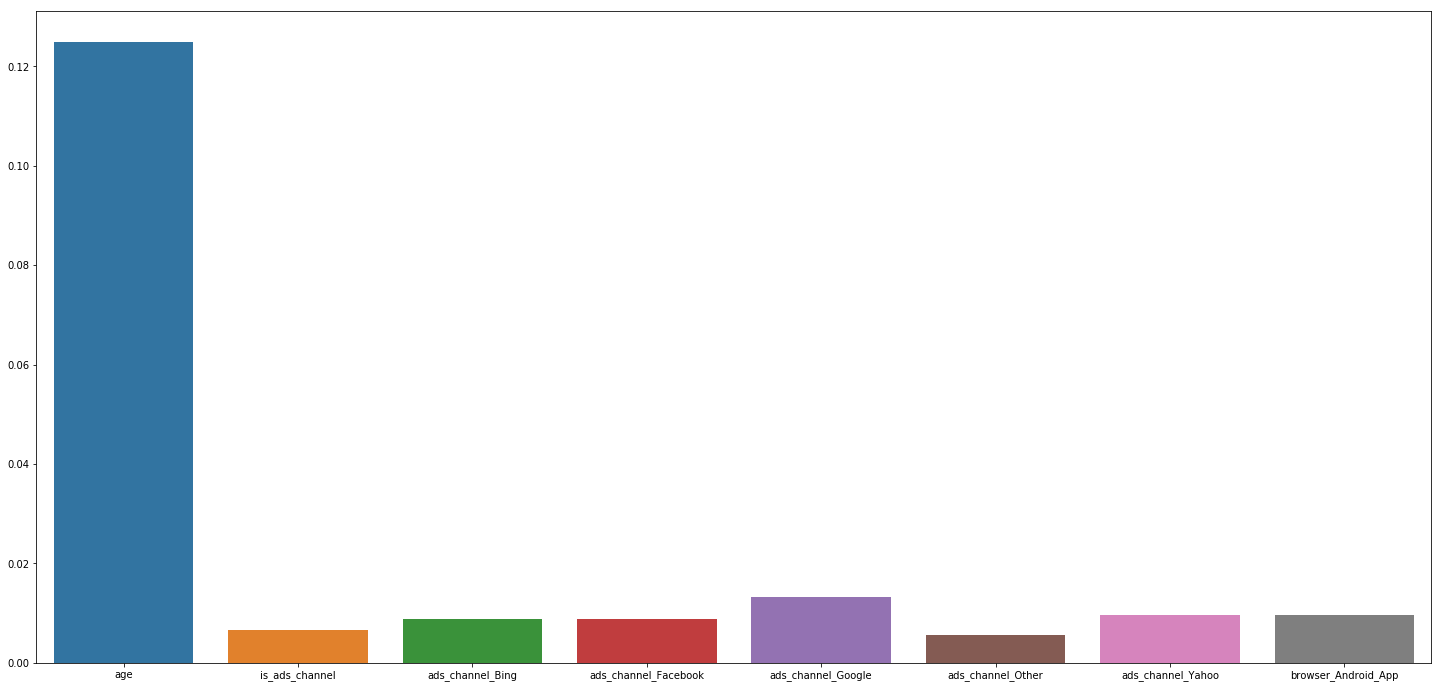

In [222]:
importance = tree.feature_importances_
importance_rank = pd.Series(X.columns, importance).sort_values(ascending = False)

#np.sort(importance)[::-1]
#index = importance.sort()[::-1]
#ax = plot.figure
_ =sns.barplot(X.columns[:8], importance[:8])
_.figure.set_size_inches(25,12)

There is one predictive feature: age

We can verify whether the signal is biased by T-test

# Use t-test to verify results
First verify the feature: country, age, conversion source

We will conclude that there is bias in the data if the data come from insignicant for some features, but significant for others


In [234]:
# print p-value for different countries
p_val =[]
country_all =[]
for i in data['country'].value_counts().index:
    temp =data.loc[data['country']==i ]
    #print(temp.head())
    s,p = stats.ttest_ind(temp.loc[temp['test']==1,  'conversion'], temp.loc[temp['test']==0,  'conversion'])
    p_val.append(p)
    country_all.append(i)
_ = pd.Series(p_val,country_all).sort_values(ascending = False)    
_

Ecuador        0.961512
Paraguay       0.883702
Uruguay        0.882812
Nicaragua      0.780351
Peru           0.771950
Bolivia        0.718877
Panama         0.705361
Costa Rica     0.687863
Venezuela      0.573740
Guatemala      0.572165
Honduras       0.471721
Colombia       0.423733
Argentina      0.321766
Chile          0.302871
El Salvador    0.248251
Mexico         0.165547
Spain               NaN
dtype: float64

Those p-values indicate that we can't conclude whether there are any effects of the country on the conversion rate. 

In [235]:
# test the age effect
s,p = stats.ttest_ind(data.loc[data['test']==1,  'age'], data.loc[data['test']==0,  'age'])
print(p)

0.14189510075984352


We can't conclude the effects of age as well.